<a href="https://colab.research.google.com/github/tamaracontreras/UPSK-SQL001-SQLZoo-murder/blob/main/Sql-Murder-Mystery/SQL_Murder_Mystery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/icarito/UPSK-SQL001-SQLZoo-murder/blob/sql-murder/Sql-Murder-Mystery/SQL_Murder_Mystery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL Murder Mystery!
Adapted By: Martin Arroyo

![Detective making connections between points](https://github.com/freestackinitiative/coop_sql_notebooks/blob/main/assets/sleuth.png?raw=1)

**Credit**

This material was adapted from the [SQL Murder Mystery by Knight Lab](https://mystery.knightlab.com/) under [Creative Commons CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/). The SQL Murder Mystery was originally created by [Joon Park](https://twitter.com/joonparkmusic) and [Cathy He](https://twitter.com/Cathy_MeiyingHe) while they were Knight Lab fellows. See the [GitHub repository](https://github.com/NUKnightLab/sql-mysteries) for more information.

## Escenario

¡Se ha cometido un crimen y los detectives necesitan tu ayuda! Te dieron el informe de la escena del crimen, pero de alguna manera lo perdiste. Recuerdas vagamente que el crimen fue un `murder` _(asesinato)_ que ocurrió en algún momento el 15 de Enero de 2018 y que tuvo lugar en `SQL City`. Depende de ti averiguar quién es el asesino usando solo tus habilidades en SQL y tu ingenio. Te proporcionan una conexión a la base de datos del Departamento de Policía, que tiene todas las pistas que necesitarás para atrapar al asesino.

Usa las habilidades que desarrollaste en SQL 101 y 102, junto con cualquier recurso que desees, para resolver el `SQL Murder Mystery`!"

## Conéctate a la base de datos del Departamento de Policía

Para comenzar y ejecutar tus consultas, presiona play en la celda de abajo para conectarte a la base de datos del Departamento de Policía.

Para ejecutar consultas, crea una nueva celda de `Code` y escribe `%%sql` en la parte superior. Luego puedes escribir tus consultas debajo. Ve el ejemplo a continuación:
```python
%%sql

SELECT *
FROM table

```

In [2]:
%%capture
# @title Press Play { display-mode: "form" }
# Install `teachdb` and `coop_grader`
print("Installing `teachdb` and its dependencies...")
!pip install --quiet --upgrade git+https://github.com/freestackinitiative/teachingdb.git git+https://github.com/martinmarroyo/coop_grader.git
print("Successfully installed `teachdb`")
import pandas as pd
from teachdb.teachdb import connect_teachdb
from coop_grader.sql_murder_mystery.check_suspect import check_suspect
# Set configurations for notebook
%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 99)
# Load data
con = connect_teachdb(database="sql_murder_mystery")

%sql con

## Descubriendo tablas en la base de datos

Comenzamos nuestra búsqueda para encontrar al asesino explorando la base de datos del Departamento de Policía. Pero aún no has visto la base de datos y no sabes cuáles son las tablas, así que, ¿cómo sabes qué buscar?

Afortunadamente, la mayoría de los sistemas de gestión de bases de datos relacionales tienen esta información almacenada en un lugar donde puedes consultarla. Muy a menudo, se utiliza un esquema especial conocido como [`information_schema`](https://en.wikipedia.org/wiki/Information_schema) para almacenar información sobre las tablas y columnas en tu base de datos (también conocido como metadata). La base de datos del Departamento de Policía tiene un information schema, con la vista `tables` que te muestra qué tablas están disponibles, y la vista `columns` que te muestra todas las columnas de cada tabla y sus tipos de datos.

### Listando todas las tablas en la base de datos de la Policía

#### Revisa la [descripción de `information_schema.tables`](https://duckdb.org/docs/sql/information_schema.html#tables-and-views)

Primero, veremos todas las tablas disponibles para nosotros consultando la vista `information_schema.tables`. Te daremos la primera consulta para empezar, pero de aquí en adelante tendrás que idear las consultas restantes utilizando tu conocimiento de SQL y tu ingenio.

Aquí está la consulta necesaria para mostrarte las tablas en la base de datos del Departamento de Policía. Cópiala/Pégala en la celda de abajo y ejecútala para ver las tablas disponibles para ti:

>```sql
>SELECT *
>FROM information_schema.tables
>```

In [ ]:
%%sql
SELECT *
FROM information_schema.tables

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action,TABLE_COMMENT
0,memory,main,crime_scene_report,BASE TABLE,None,None,None,None,None,YES,NO,None,None
1,memory,main,drivers_license,BASE TABLE,None,None,None,None,None,YES,NO,None,None
2,memory,main,facebook_event_checkin,BASE TABLE,None,None,None,None,None,YES,NO,None,None
3,memory,main,get_fit_now_check_in,BASE TABLE,None,None,None,None,None,YES,NO,None,None
4,memory,main,get_fit_now_member,BASE TABLE,None,None,None,None,None,YES,NO,None,None
5,memory,main,income,BASE TABLE,None,None,None,None,None,YES,NO,None,None
6,memory,main,interview,BASE TABLE,None,None,None,None,None,YES,NO,None,None
7,memory,main,person,BASE TABLE,None,None,None,None,None,YES,NO,None,None


### Listando todas las tablas y sus columnas en la base de datos de la Policía

**Revisa la [descripción de `information_schema.columns`](https://duckdb.org/docs/sql/information_schema.html#columns)**

¡Genial! Ahora que sabes qué tablas están disponibles, es hora de averiguar las columnas que tiene cada tabla junto con el tipo de datos de cada columna. Escribe una consulta que muestre el nombre de la tabla, el nombre de la columna y el tipo de datos para cada tabla en la base de datos del Departamento de Policía utilizando la vista `information_schema.columns`. Asegúrate de que la salida esté ordenada por nombre de tabla y luego por nombre de columna (ascendente):

*Pistas opcionales - ¡intenta usarlas solo si te quedas **REALMENTE** atascado!*

<details>
<summary>Pista 1</summary>
<p>Estructura tu consulta de la misma manera que lo hicimos en la consulta anterior donde miramos `information_schema.tables`</p>
</details>

<details>
<summary>Pista 2</summary>
<p>Asegúrate de revisar el enlace para la descripción de information_schema.columns. Te dirá los nombres de las columnas que debes usar para la consulta. Recuerda, queremos el nombre de la tabla, el nombre de la columna y el tipo de datos - ¡revisa la descripción para encontrar los nombres apropiados!</p>
</details>

<details>
<summary>Pista 3</summary>
<p>No olvides usar la declaración ORDER BY para ordenar los resultados de tu búsqueda. Estamos buscando ordenar ambas columnas en orden ascendente, lo cual se puede especificar usando la palabra clave ASC, sin embargo, también es el orden de clasificación predeterminado, por lo que ASC no es necesariamente requerido.</p>
</details>

In [ ]:
%%sql
SELECT *
FROM information_schema.columns



,table_catalog,table_schema,table_name,column_name,ordinal_position,column_default,is_nullable,data_type,character_maximum_length,character_octet_length,numeric_precision,numeric_precision_radix,numeric_scale,datetime_precision,interval_type,interval_precision,character_set_catalog,character_set_schema,character_set_name,collation_catalog,collation_schema,collation_name,domain_catalog,domain_schema,domain_name,udt_catalog,udt_schema,udt_name,scope_catalog,scope_schema,scope_name,maximum_cardinality,dtd_identifier,is_self_referencing,is_identity,identity_generation,identity_start,identity_increment,identity_maximum,identity_minimum,identity_cycle,is_generated,generation_expression,is_updatable,COLUMN_COMMENT
0,memory,main,crime_scene_report,date,1,None,YES,BIGINT,NaN,NaN,64.0,2.0,0.0,NaN,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,None,None,NaN,None
1,memory,main,crime_scene_report,type,2,None,YES,VARCHAR,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,None,None,NaN,None
2,memory,main,crime_scene_report,description,3,None,YES,VARCHAR,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,None,None,NaN,None
3,memory,main,crime_scene_report,city,4,None,YES,VARCHAR,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,None,None,NaN,None
4,memory,main,drivers_license,id,1,None,YES,BIGINT,NaN,NaN,64.0,2.0,0.0,NaN,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,None,None,NaN,None
5,memory,main,drivers_license,age,2,None,YES,BIGINT,NaN,NaN,64.0,2.0,0.0,NaN,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,None,None,NaN,None
6,memory,main,drivers_license,height,3,None,YES,BIGINT,NaN,NaN,64.0,2.0,0.0,NaN,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,None,None,NaN,None
7,memory,main,drivers_license,eye_color,4,None,YES,VARCHAR,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,None,None,NaN,None
8,memory,main,drivers_license,hair_color,5,None,YES,VARCHAR,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,None,None,NaN,None
9,memory,main,drivers_license,gender,6,None,YES,VARCHAR,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,NaN,NaN,None,None,None,None,None,NaN,None,None,NaN,None


### Entity Relationship Diagram (Optional)

After doing some detective work and finding the tables in the Police Department database, you discover that there is an ERD! This can be really helpful in your quest to find the murderer. If you like, challenge yourself (and your SQL skills) to continue on by just querying the `information_schema` as needed. Otherwise, you can click the dropdown below to reveal the ERD to help you see the tables and relationships in the Police Department database at a glance:

<details>
  <summary>Check the SQL Murder Mystery ERD</summary>
  <img src="https://github.com/freestackinitiative/coop_sql_notebooks/blob/main/assets/murder_mystery_schema.png?raw=1" alt="ERD for SQL Murder Mystery"/>
</details>

### Diagrama de Relaciones de Entidad (Opcional)

Después de hacer un poco de trabajo de detective y encontrar las tablas en la base de datos del Departamento de Policía, descubres que hay un ERD (Diagrama de Relaciones de Entidad). Esto puede ser realmente útil en tu búsqueda para encontrar al asesino. Si lo prefieres, desafíate a ti mismo (y tus habilidades en SQL) a continuar solo consultando el `information_schema` según sea necesario. De lo contrario, puedes hacer clic en el desplegable a continuación para revelar el ERD que te ayudará a ver las tablas y las relaciones en la base de datos del Departamento de Policía de un vistazo:

<details>
  <summary>Revisa el ERD del SQL Murder Mystery</summary>
  <img src="https://github.com/freestackinitiative/coop_sql_notebooks/blob/main/assets/murder_mystery_schema.png?raw=1" alt="ERD for SQL Murder Mystery"/>
</details>

In [ ]:
%%sql
SELECT *
FROM person
WHERE name LIKE '%Annabel%'




,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143
1,78354,Annabell Siona,158932,978,Whitewater Dr,800278294
2,78799,Annabell Droneburg,984316,1944,W Natalie Dr,478793500
3,86541,Annabell Zwilling,709133,1859,Patti Rd,332961158


___

## Resolviendo el Misterio (y verificando si resolviste el caso)

De aquí en adelante, usarás tus habilidades y las pistas en la base de datos del Departamento de Policía para encontrar al asesino. Cuando creas que has encontrado al asesino, vuelve a esta sección y usa la celda de abajo para verificar tu respuesta y ver si encontraste al asesino:

ejemplo:
```python
check_suspect("Adam Levine")
```

In [40]:
check_suspect("Miranda Priestly")

Congrats, you found the brains behind the murder!
Everyone in SQL City hails you as the greatest SQL detective of all time.
Time to break out the champagne!


True

---

## Espacio de Trabajo

Usa las celdas de abajo para escribir tus consultas y trabajar en resolver el misterio. Cuando tengas un sospechoso, verifica tu respuesta usando la [celda arriba de esta](#solving-the-mystery-and-checking-if-you-cracked-the-case) y ejecuta su nombre a través de la función `check_suspect`. Si encuentras al asesino, la función te lo dirá.

No olvides usar `%%sql` en la parte superior de las celdas de `Code` que crees para que tus consultas SQL funcionen. ¡Buena suerte, detectives!

Como primera consulta  dentro de la tabla crime_scene_report , filtré por tipo
de delito , en este caso murder y la fecha del asesinato.
Tenemos como resultado: Dos testigos , el primero vive en la ultima casa de la calle Northwestern Dr.
El segundo testigo se llama Annabel y vive en algun lugar de Franklin Ave.




In [ ]:
%%sql
SELECT *
FROM crime_scene_report
WHERE type ='murder' AND date = 20180115




,date,type,description,city
0,20180115,murder,Life? Dont talk to me about life.,Albany
1,20180115,murder,"Mama, I killed a man, put a gun against his head...",Reno
2,20180115,murder,Security footage shows that there were 2 witnesses. The first witness lives at the last house o...,SQL City


En la siguiente consulta buscamos el **primer testigo**, sabemos que vive en la ultima casa de **Northwestern Dr**





In [ ]:
%%sql
SELECT *
FROM person
WHERE addres_street_name LIKE 'Northwestern%'
ORDER BY address_number DESC

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949
1,17729,Lasonya Wildey,439686,3824,Northwestern Dr,917817122
2,53890,Sophie Tiberio,957671,3755,Northwestern Dr,442830147
3,73368,Torie Thalmann,773862,3697,Northwestern Dr,341559436
4,96595,Coretta Cubie,303645,3631,Northwestern Dr,378403829
5,19420,Cody Schiel,890431,3524,Northwestern Dr,947110049
6,93509,Emmitt Aceuedo,916706,3491,Northwestern Dr,979073160
7,87456,Leonora Wolfsberger,215868,3483,Northwestern Dr,565203106
8,36378,Freddie Ellzey,267882,3449,Northwestern Dr,474117596
9,53076,Boris Bijou,664914,3327,Northwestern Dr,401191868


En la siguiente consulta buscamos en la **tabla interview** para ver que dijo el testigo

In [ ]:
%%sql
SELECT *
FROM interview
WHERE person_id =14887

,person_id,transcript
0,14887,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership nu..."


Dice: Escuché un disparo y luego vi a un hombre salir corriendo. Tenía una bolsa de **"Get Fit Now Gym"**. **El número de membresía **en la bolsa comenzaba con **"48Z".** Sólo los miembros de **oro** tienen esas bolsas. El hombre se subió a un coche con una placa que decía **"H42W"**.

En la proxima consulta nos vamos a la tabla **git fit now member** y filtramos por **gold y la pista 48z**

In [ ]:
%%sql
SELECT *
FROM get_fit_now_member
WHERE membership_status ='gold' AND id LIKE '48Z%'

,id,person_id,name,membership_start_date,membership_status
0,48Z7A,28819,Joe Germuska,20160305,gold
1,48Z55,67318,Jeremy Bowers,20160101,gold


En la proxima consulta en la **tabla person** veré por el **id** de la consulta anterior para saber quien **posee licencia** :

In [ ]:
%%sql
SELECT *
FROM person
WHERE id IN (28819, 67318)


,id,name,license_id,address_number,address_street_name,ssn
0,28819,Joe Germuska,173289,111,Fisk Rd,138909730
1,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


En la proxima consulta verifico cual de los dos tiene **licencia de conducir :**

In [ ]:
%%sql
SELECT *
FROM drivers_license
WHERE id IN (173289, 423327)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS


La consulta anterior coincide con la patente indicada   ** 0H42W2**
En la proxima consulta verificamos a la segunda testigo Annabel:


In [ ]:
%%sql
SELECT *
FROM person
WHERE name LIKE '%Annabel%'


,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143
1,78354,Annabell Siona,158932,978,Whitewater Dr,800278294
2,78799,Annabell Droneburg,984316,1944,W Natalie Dr,478793500
3,86541,Annabell Zwilling,709133,1859,Patti Rd,332961158


Ingresé a la tabla person y filtre por el nombre Annabel, y me indicó el ID para buscarlo en la tabla de interview.

In [ ]:
%%sql
SELECT *
FROM interview
WHERE person_id ='16371'

,person_id,transcript
0,16371,"I saw the murder happen, and I recognized the killer from my gym when I was working out last we..."


Como resultado de la tabla interview , filtrando por el ID de Annabel indica : Vi el cuando ocurrio el asesinato, y reconoci el asesino de mi gimmnacio cuando estaba ejercitándome la semana pasada, el 9 de Enero.



In [ ]:
%%sql
SELECT *
FROM get_fit_now_member
WHERE person_id ='16371'

,id,person_id,name,membership_start_date,membership_status
0,90081,16371,Annabel Miller,20160208,gold


Como ya tengo el ID puedo ver la tabla de get_now_check_in  y filtrar por membership_id de Annabel '90081
'

In [ ]:
%%sql
SELECT *
FROM get_fit_now_check_in
WHERE membership_id ='90081'

,membership_id,check_in_date,check_in_time,check_out_time
0,90081,20180109,1600,1700


esta pista me indica que ella asistio al gym entre las 16:00 hrs y las 17:00 hs del 9 de enero como indicaba anteriormente en la tabla de interview.

In [ ]:
%%sql
SELECT *
FROM get_fit_now_check_in
WHERE check_in_date = 20180109 AND NOT check_out_time < 1600

,membership_id,check_in_date,check_in_time,check_out_time
0,48Z7A,20180109,1600,1730
1,48Z55,20180109,1530,1700
2,90081,20180109,1600,1700


Con esta consulta estoy viendo todos los asistentes el día 9 de Enero y el tiempo de salida debe ser desde la 16:oo horas en adelante, ya que Annabel estuvi entre las 16:00 y  las 17 hrs


In [ ]:
%%sql
SELECT *
FROM get_fit_now_member
WHERE id IN ('48Z7A', '48Z55')

,id,person_id,name,membership_start_date,membership_status
0,48Z7A,28819,Joe Germuska,20160305,gold
1,48Z55,67318,Jeremy Bowers,20160101,gold


Con membership_id de la consulta anterior , ingreso a la tabla de get_fit_now_member para consultar los asistentes que estivieron ese dia con Annabell (48z7a y 48z55).

Aca en entrega dos presuntos sopechosos

In [ ]:
%%sql
SELECT *
FROM person
WHERE id IN ('28819', '67318')

,id,name,license_id,address_number,address_street_name,ssn
0,28819,Joe Germuska,173289,111,Fisk Rd,138909730
1,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


Con los id ingreso a la tabla de person y verifico la licencias de los sospechosos segun Annabell con su id


Como primer sospecho tenemos a Jeremy Bowers, el cual comprobamos en la casilla y nos arrojó el siguiente mensaje:

 **¡Felicidades, encontraste al asesino! Pero espera, hay más... Si crees que estás preparado para un desafío, intenta consultar la transcripción de la entrevista del asesino para encontrar al verdadero villano detrás de este crimen. Si te sientes especialmente seguro de tus habilidades de SQL, intenta completar esto. paso final con no más de 2 consultas.**


En la siguiente consulta miramos en la tabla interview segun el id del sospechoso :

In [11]:
%%sql
SELECT *
FROM interview
WHERE person_id = 67318

,person_id,transcript
0,67318,"I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5"" ..."


 La Entrevista indica : Me contrató **una mujer** con mucho dinero. No sé su nombre, pero sé que **mide alrededor de 5'5" (65") o 5'7" (67")**.
 Tiene el **pelo rojo** y **conduce un Tesla Model S**.
 Sé que **asistió al Concierto Sinfónico SQL tres veces en diciembre de 2017.**

In [ ]:
%%sql
SELECT *
FROM drivers_license
WHERE gender='female' AND hair_color ='red' AND car_make ='Tesla'

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,202298,68,66,green,red,female,500123,Tesla,Model S
1,291182,65,66,blue,red,female,08CM64,Tesla,Model S
2,918773,48,65,black,red,female,917UU3,Tesla,Model S


En la consulta anterior, verificamos las características en la tabla **drivers_licence**, solo nos queda afuera la pista del concierto

---



En la siguiente consulta verificamos **los eventos de face**, por el **nombre del evento, la fecha entre el 1 y el 31 de dic de 2017**, luego viene la **subconsulta** que selecciona los ** person_id** que cumplen con las mismas condiciones,  **agrupamos** los resultados por **person_id** que aparecen 3 veces, **que son las veces q el nuevo sospechoso fue al evento de sql.**

In [23]:
%%sql
SELECT *
FROM facebook_event_checkin
WHERE event_name = 'SQL Symphony Concert'
  AND date BETWEEN 20171201 AND 20171231
  AND person_id IN (
    SELECT person_id
    FROM facebook_event_checkin
    WHERE event_name = 'SQL Symphony Concert'
      AND date BETWEEN 20171201 AND 20171231
    GROUP BY person_id
    HAVING COUNT(*) = 3
  )
ORDER BY person_id;




,person_id,event_id,event_name,date
0,24556,1143,SQL Symphony Concert,20171207
1,24556,1143,SQL Symphony Concert,20171221
2,24556,1143,SQL Symphony Concert,20171224
3,99716,1143,SQL Symphony Concert,20171206
4,99716,1143,SQL Symphony Concert,20171212
5,99716,1143,SQL Symphony Concert,20171229


En la siguiente consulta nos vamos a la **tabla person** y filtramos por los id obtenidos anteriormente, para ver quien es de sexo **femenino**, segun las personas que asistieron 3 veces en dic al SQL Symphony

In [32]:
%%sql
SELECT *
FROM person
WHERE id IN (24556, 99716)


,id,name,license_id,address_number,address_street_name,ssn
0,24556,Bryan Pardo,101191,703,Machine Ln,816663882
1,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


Corroboramos la respuesta y nos indica :

**¡Felicidades, encontraste el cerebro detrás del asesinato!
Todos en SQL City te aclaman como el mejor detective de SQL de todos los tiempos.
¡Es hora de abrir el champán!:**
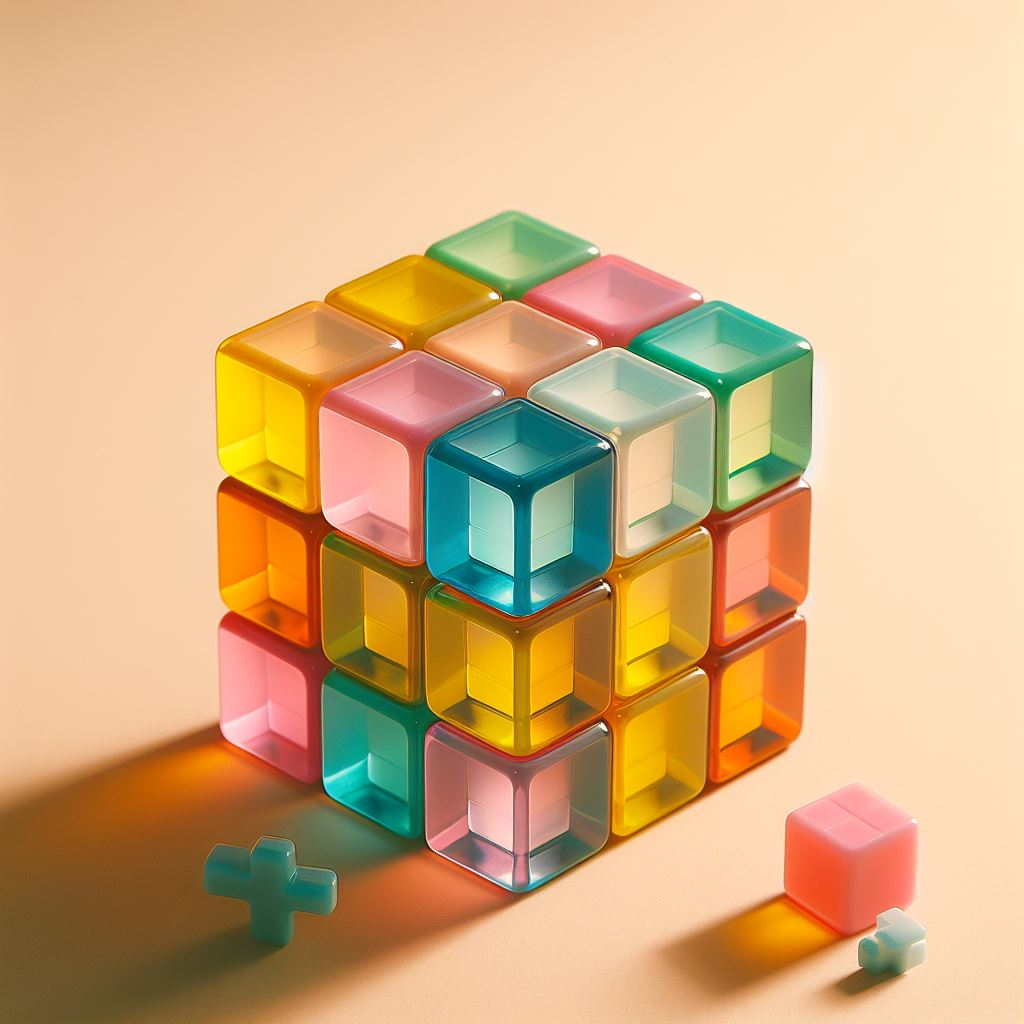